In [200]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [201]:
ABS_PATH = os.path.abspath("")
VIDEO_PATH = os.path.join(os.path.dirname(ABS_PATH), "Recordings", "Videos")

videos = {}

for root, dirs, fnames in os.walk(VIDEO_PATH):
    videos[root] = [cv2.VideoCapture(os.path.join(root, fname)) for fname in fnames]

videos

{'c:\\Users\\moorb\\Documents\\MyProjects\\Code\\Repositories\\CameraTracking\\Recordings\\Videos': [],
 'c:\\Users\\moorb\\Documents\\MyProjects\\Code\\Repositories\\CameraTracking\\Recordings\\Videos\\2024-11-19': [< cv2.VideoCapture 00000245DCFD3BF0>,
  < cv2.VideoCapture 00000245DCFD1950>]}

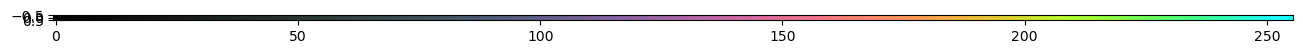

In [202]:
mat = np.array([-0.14861, 1.78277, -0.29227, -0.90649, 1.97294, 0]).reshape(3,2)

def get_cube_helix_colormap(lamb, start_color=30, rotations=0.005, hue=1/255, gamma=1):
    lamb = np.array(lamb)
    a = ((hue*lamb**gamma * (1-lamb**gamma))/2)
    phi = 2*np.pi*(start_color/3+rotations*lamb)
    cube_helix_colormap = lamb**gamma + a*mat @ np.array([np.cos(phi), np.sin(phi)])
    return np.clip(cube_helix_colormap, 0, 255).astype("uint8")

cube_helix_colormap = np.array([get_cube_helix_colormap(i) for i in range(256)])
plt.figure(figsize=(16,5))
plt.imshow(np.array(cube_helix_colormap).reshape(1, 256, 3));   

In [203]:
cap = videos[root][0]

frames = []

while True:
    ret, frame = cap.read()
    if not ret: break
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    frame = cube_helix_colormap[frame]
    frames.append(frame)

fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter("test.mp4", fourcc, 20.0, (frames[-1].shape[1], frames[-1].shape[0]), isColor=True) 

for frame in frames: 
    out.write(frame)

out.release()
cap.release()

